**Import required libraries and scripts**

In [1]:
#Import required libraries and scripts
from scripts.library_preparation import *
from scripts.utilities import *
from scripts.docking_functions import *
from scripts.clustering_functions import *
from scripts.rescoring_functions import *
from scripts.ranking_functions import *
from scripts.performance_calculation import *
import numpy as np
import os

software = '/home/tony/CADD22/software'
protein_file = '/home/tony/CADD22/wocondock_main/2o1x_A_apo_protoss.pdb'
ref_file = '/home/tony/CADD22/wocondock_main/2o1x_A_lig_protoss.sdf'
docking_library = '/home/tony/CADD22/wocondock_main/Selection_of_FCHGroup_LeadLike.sdf'
docking_programs = ['GNINA', 'SMINA', 'PLANTS']
clustering_metrics = ['RMSD', 'spyRMSD', 'espsim', '3DScore', 'bestpose', 'bestpose_GNINA', 'bestpose_SMINA', 'bestpose_PLANTS']
rescoring_functions = ['gnina', 'AD4', 'chemplp', 'rfscorevs']
id_column = 'ID'
n_poses = 10
exhaustiveness = 4

#Initialise variables and create a temporary folder
w_dir = os.path.dirname(protein_file)
print('The working directory has been set to:', w_dir)
create_temp_folder(w_dir+'/temp')

[17:37:24] Initializing Normalizer


The working directory has been set to: /home/tony/CADD22/wocondock_main
The folder: /home/tony/CADD22/wocondock_main/temp already exists


In [ ]:
pocket_definition = binding_site_coordinates_dogsitescorer(protein_file, w_dir, method='volume')

In [ ]:
cleaned_pkasolver_df = prepare_library(docking_library, id_column, software, 'pkasolver')

In [ ]:
all_poses = docking(protein_file, ref_file, software, docking_programs, exhaustiveness, n_poses)

In [ ]:
docking_splitted(w_dir, protein_file, ref_file, software, docking_programs, exhaustiveness, n_poses)

In [2]:
docking_splitted_futures(w_dir, protein_file, ref_file, software, docking_programs, exhaustiveness, n_poses)

Splitting SDF file final_library.sdf ...
The folder: /home/tony/CADD22/wocondock_main/temp/split_final_library was created
Split docking library into 5 files each containing 2 compounds
The folder: /home/tony/CADD22/wocondock_main/temp/plants was created
Converting protein file to .mol2 format for PLANTS docking...
Converting reference file from .sdf to .mol2 format for PLANTS docking...
Determining binding site coordinates using PLANTS...
Docking split files using PLANTS...


100%|██████████| 5/5 [00:00<00:00, 118.68it/s]


Docking with PLANTS complete in 64.4818!
Docking split files using SMINA...


100%|██████████| 5/5 [00:00<00:00, 147.18it/s]


Docking with SMINA complete in 73.4576!
Docking split files using GNINA...


100%|██████████| 5/5 [00:00<00:00, 139.70it/s]


Docking with GNINA complete in 85.4605!


Fetching docking poses...


100%|██████████| 17/17 [00:00<00:00, 43.70it/s]


Combined all docking poses in 0.7128!


,ID,CHEMPLP,Molecule,Pose ID,SMINA_Affinity,GNINA_Affinity,CNNscore,CNNaffinity,CNN_VS
0,FCG1390566,-71.9150,,FCG1390566_PLANTS_01,NaN,NaN,NaN,NaN,NaN
1,FCG1390566,-66.5795,,FCG1390566_PLANTS_02,NaN,NaN,NaN,NaN,NaN
2,FCG1390566,-66.4802,,FCG1390566_PLANTS_03,NaN,NaN,NaN,NaN,NaN
3,FCG1390566,-63.1923,,FCG1390566_PLANTS_04,NaN,NaN,NaN,NaN,NaN
4,FCG1390566,-62.6955,,FCG1390566_PLANTS_05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15,FCG16600623,NaN,,FCG16600623_GNINA_6,NaN,-0.14195,0.5672301054,5.9292335510,3.3632397652
16,FCG16600623,NaN,,FCG16600623_GNINA_7,NaN,-5.47436,0.4481829107,6.2056875229,2.7812831402
17,FCG16600623,NaN,,FCG16600623_GNINA_8,NaN,-9.67270,0.4365283549,6.5132207870,2.8432054520
18,FCG16600623,NaN,,FCG16600623_GNINA_9,NaN,-7.48895,0.4319055676,6.2404356003,2.6952788830

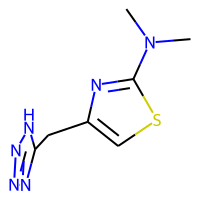
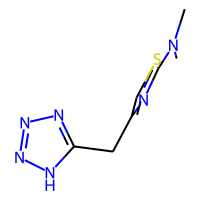
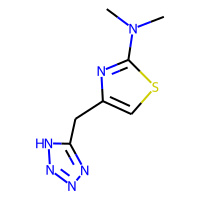
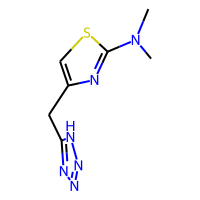
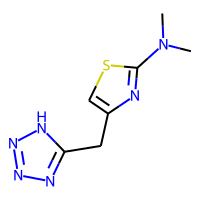
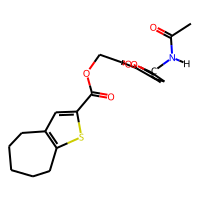
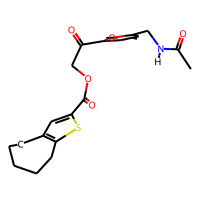
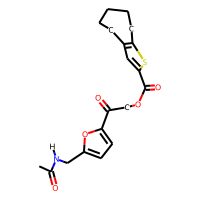
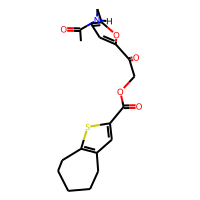
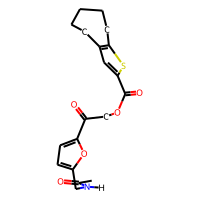

In [4]:
fetch_poses_splitted(w_dir, n_poses, split_files_folder=w_dir+'/temp/split_final_library')

In [5]:
print('Loading all poses SDF file...')
tic = time.perf_counter()
all_poses = PandasTools.LoadSDF(w_dir+'/temp/allposes.sdf', idName='Pose ID', molColName='Molecule', includeFingerprints=False, strictParsing=True)
toc = time.perf_counter()
print(f'Finished loading all poses SDF in {toc-tic:0.4f}!...')

Loading all poses SDF file...
Finished loading all poses SDF in 0.1816!...


In [7]:
for metric in clustering_metrics:
    cluster_futures(f'{metric}', 'KMedoids', w_dir, protein_file, all_poses)

The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating RMSD metrics and clustering*
Submitting parallel jobs...


100%|██████████| 9/9 [00:00<00:00, 165.83it/s]


Finished submitting jobs in 0.0576, now running jobs...


100%|██████████| 9/9 [00:01<00:00,  6.86it/s]


The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating spyRMSD metrics and clustering*
Submitting parallel jobs...


100%|██████████| 9/9 [00:00<00:00, 185.00it/s]


Finished submitting jobs in 0.0518, now running jobs...


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating espsim metrics and clustering*
Submitting parallel jobs...


100%|██████████| 9/9 [00:00<00:00, 165.61it/s]


Finished submitting jobs in 0.0576, now running jobs...


100%|██████████| 9/9 [00:00<00:00,  9.24it/s]


The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating 3DScore metrics and clustering*
Submitting parallel jobs...


100%|██████████| 9/9 [00:00<00:00, 181.33it/s]


Finished submitting jobs in 0.0542, now running jobs...


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating bestpose metrics and clustering*
The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating bestpose_GNINA metrics and clustering*
The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating bestpose_SMINA metrics and clustering*
The folder: /home/tony/CADD22/wocondock_main/temp/clustering/ already exists
*Calculating bestpose_PLANTS metrics and clustering*


**Rescoring**

The file containing all the cluster centers is then rescored using all scoring functions available (GNINA, Vina, AutoDock4, PLP, CHEMPLP, RF-Score-VS). The rescored output is return as a dataframe.

In [8]:
for metric in clustering_metrics:
    rescore_all(w_dir, protein_file, ref_file, software, w_dir+f'/temp/clustering/{metric}_clustered.sdf', rescoring_functions, 0)


The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered/gnina_rescoring/ was created
Rescoring with GNINA
Rescoring with GNINA complete in 4.0416!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7659!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered/chemplp_rescoring/ was created


24 molecules converted


Rescoring with CHEMPLP complete in 1.5974!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 5.0995!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_RMSD_clustered


100%|██████████| 3/3 [00:00<00:00, 466.09it/s]

Rescoring complete in 11.5260!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 3.8882!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7596!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered/chemplp_rescoring/ was created


24 molecules converted


Rescoring with CHEMPLP complete in 1.5901!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 5.1000!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_spyRMSD_clustered


100%|██████████| 3/3 [00:00<00:00, 475.62it/s]

Rescoring complete in 11.3567!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 3.2279!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.8766!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered/chemplp_rescoring/ was created


18 molecules converted


Rescoring with CHEMPLP complete in 1.6863!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.7754!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_espsim_clustered


100%|██████████| 3/3 [00:00<00:00, 511.56it/s]

Rescoring complete in 10.5838!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 1.9085!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7230!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered/chemplp_rescoring/ was created


9 molecules converted


Rescoring with CHEMPLP complete in 1.7226!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.9766!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_3DScore_clustered


100%|██████████| 3/3 [00:00<00:00, 510.84it/s]

Rescoring complete in 9.3500!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 4.3382!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7530!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered/chemplp_rescoring/ was created


27 molecules converted


Rescoring with CHEMPLP complete in 1.6150!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.8000!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_clustered


100%|██████████| 3/3 [00:00<00:00, 447.89it/s]

Rescoring complete in 11.5255!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 1.9897!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7017!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered/chemplp_rescoring/ was created


9 molecules converted


Rescoring with CHEMPLP complete in 1.5553!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.7858!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_GNINA_clustered


100%|██████████| 3/3 [00:00<00:00, 494.15it/s]

Rescoring complete in 9.0504!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 1.9755!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.7538!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered/chemplp_rescoring/ was created


9 molecules converted


Rescoring with CHEMPLP complete in 1.5500!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.9797!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_SMINA_clustered


100%|██████████| 3/3 [00:00<00:00, 464.66it/s]

Rescoring complete in 9.2773!
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered was created
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered/gnina_rescoring/ was created
Rescoring with GNINA


Rescoring with GNINA complete in 1.9704!
Rescoring with AD4
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered/AD4_rescoring/ was created
Rescoring with AD4 complete in 0.6779!
Rescoring with CHEMPLP
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered/chemplp_rescoring/ was created


9 molecules converted


Rescoring with CHEMPLP complete in 1.6160!
Rescoring with RFScoreVS
The folder: /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered/rfscorevs_rescoring was created
Rescoring with RF-Score-VS complete in 4.7644!
Combining all score for /home/tony/CADD22/wocondock_main/temp/rescoring_bestpose_PLANTS_clustered


100%|██████████| 3/3 [00:00<00:00, 453.59it/s]

Rescoring complete in 9.0483!


**Final ranking methods**

This code calculates the final ranking of compounds using various methods.
*Method 1* : Calculates ECR value for each cluster center, then outputs the top ranked center.
*Method 2* : Calculates ECR value for each cluster center, then outputs the average ECR value for each compound.
*Method 3* : Calculates the average rank of each compound, then ouputs the corresponding ECR value for each compound.
*Method 6* : Calculates Z-score for each cluster center, then ouputs the top ranked center.
*Method 7* : Calculates Z-score for each cluster center, then ouputs the average Z-score for each compound.

All methods are then combined into a single dataframe for comparison purposes.

In [ ]:
apply_consensus_methods(w_dir, ['bestpose_GNINA', 'bestpose_SMINA', 'bestpose_PLANTS'])

In [ ]:
calculate_EFs(w_dir, docking_library)